In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
from scipy import stats
import plotly.express as px
import plotly
import numpy as np
import seaborn as sns
from scipy.stats import norm

import matplotlib.pyplot as plt

In [2]:
PROC_DATA_PATH = '~/library/data/processed/'

In [3]:
df = pd.read_csv(PROC_DATA_PATH + 'youth_data_labelled.csv', sep=',', index_col=0)

In [6]:
df_0 = df[['NVQ4_rate', 'youth_unemployment_rate', 'no_qualif_rate', 'NVQ3_rate', 'NVQ2_rate', 'NVQ1_rate', 'group_qualif']]

In [208]:
df_1 = df[['3_year_survival_rate', 'job_density', '3_year_survival_number', 'number_of_jobs','youth_unemployment_rate','group_econ']]

In [194]:
df

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3,1,1
1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5,0,0
2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2,1,1
3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2,1,1
4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5,1,1
5,Camden,2011,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0,8.2,7.2,5.2,0,0
6,Croydon,2011,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2,12.0,16.5,12.0,1,1
7,Ealing,2011,1270.0,57.5,148000,0.63,10.0,54.7,12.986582,5.9,13.8,7.4,6.8,0,0
8,Enfield,2011,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4,13.0,12.5,12.5,1,1
9,Greenwich,2011,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6,14.0,10.7,9.0,1,1


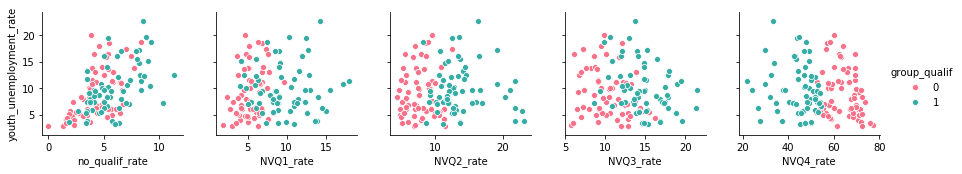

In [12]:
fig = sns.pairplot(df_0, diag_kind='kde', hue='group_qualif',
                   palette="husl", diag_kws=dict(shade=True),
                   x_vars=['no_qualif_rate','NVQ1_rate' , 'NVQ2_rate' ,'NVQ3_rate', 'NVQ4_rate'],
                   y_vars=['youth_unemployment_rate'])

In [13]:
df[df['group_qualif'] == 1]['NVQ4_rate'].describe()

count    63.000000
mean     44.436508
std       8.227987
min      21.700000
25%      41.350000
50%      47.100000
75%      50.050000
max      54.200000
Name: NVQ4_rate, dtype: float64

In [14]:
df[df['group_qualif'] == 0]['NVQ4_rate'].describe()

count    65.000000
mean     64.136923
std       6.510150
min      52.200000
25%      58.200000
50%      64.000000
75%      69.400000
max      77.400000
Name: NVQ4_rate, dtype: float64

In [24]:
df[df['group_qualif'] == 1]['youth_unemployment_rate'].describe()

count    63.000000
mean      9.963236
std       4.546881
min       3.233470
25%       7.108648
50%       9.460921
75%      12.339205
max      22.734367
Name: youth_unemployment_rate, dtype: float64

In [27]:
df[df['group_qualif'] == 0].groupby('year')['youth_unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2011,16.0,13.848032,4.041935,5.739796,11.235844,13.426262,17.525762,20.111833
2012,14.0,10.940410,3.907735,4.798762,8.040964,10.491226,13.892551,16.388428
2013,17.0,7.452305,2.517328,3.981886,5.522902,6.767607,10.002041,11.346710
2014,18.0,4.959480,1.446024,2.771333,3.782645,4.985821,6.159985,7.496625


In [106]:
arr_gr1 = df[df['group_qualif'] == 1].groupby('youth_unemployment_rate')['area'].unique().tolist()

In [118]:
arr_gr2 = df[df['group_qualif'] == 0].groupby('youth_unemployment_rate')['area'].unique().tolist()

In [119]:
values_gr1, count_gr1 = np.unique(arr_gr1, return_counts=True)

In [120]:
values_gr2, count_gr2 = np.unique(arr_gr2, return_counts=True)

In [121]:
gr1_diff_gr2 = np.setdiff1d(values_gr1, values_gr2)

In [123]:
gr2_diff_gr1 = np.setdiff1d(values_gr2, values_gr1)

In [124]:
print(gr2_diff_gr1)

['Camden' 'Hackney' 'Hammersmith and Fulham' 'Haringey' 'Islington'
 'Kensington and Chelsea' 'Lambeth' 'Lewisham' 'Richmond upon Thames'
 'Southwark' 'Wandsworth' 'Westminster']


In [125]:
print(gr1_diff_gr2)

['Barking and Dagenham' 'Bexley' 'Bromley' 'Croydon' 'Enfield' 'Greenwich'
 'Havering' 'Hillingdon' 'Newham' 'Redbridge' 'Sutton' 'Waltham Forest']


In [131]:
gr1_df = df[df['area'].isin(gr1_diff_gr2)]

In [132]:
gr2_df = df[df['area'].isin(gr2_diff_gr1)]

In [133]:
gr1_df.describe()

,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000
mean,2012.500000,954.791667,59.295833,103333.333333,0.574583,9.085417,42.589583,10.257402,5.831250,15.154167,14.600000,10.437500,1.0,0.833333
std,1.129865,291.240849,3.672900,40197.561762,0.184667,2.310014,8.199487,4.966574,2.277097,2.709790,3.770829,3.324546,0.0,0.376622
min,2011.000000,455.000000,52.000000,54000.000000,0.400000,5.300000,21.700000,3.233470,1.900000,9.800000,8.200000,4.000000,1.0,0.000000
25%,2011.750000,718.750000,56.575000,78750.000000,0.460000,7.150000,37.700000,6.160735,3.800000,13.575000,11.850000,8.275000,1.0,1.000000
50%,2012.500000,937.500000,59.350000,88500.000000,0.535000,8.950000,44.550000,9.535156,5.350000,14.900000,13.700000,10.700000,1.0,1.000000
75%,2013.250000,1130.000000,62.225000,119750.000000,0.610000,10.725000,48.150000,13.406488,7.925000,16.950000,16.350000,12.625000,1.0,1.000000
max,2014.000000,1535.000000,66.700000,220000.000000,1.150000,14.200000,53.800000,22.734367,11.400000,21.500000,23.100000,18.000000,1.0,1.000000


In [134]:
gr2_df.describe()

,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.0,48.000000
mean,2012.500000,1652.916667,57.447917,207520.833333,1.237917,8.131250,66.754167,9.479953,4.37500,9.666667,6.904167,5.077083,0.0,0.187500
std,1.129865,867.889856,4.001754,171030.542200,1.051855,2.016438,5.300701,4.569318,1.56932,2.324553,1.778232,1.422350,0.0,0.570787
min,2011.000000,765.000000,42.100000,74000.000000,0.390000,4.200000,55.600000,2.865119,0.00000,5.700000,4.300000,1.800000,0.0,0.000000
25%,2011.750000,1111.250000,55.775000,107000.000000,0.597500,6.600000,62.925000,6.046964,3.65000,7.825000,5.500000,4.100000,0.0,0.000000
50%,2012.500000,1332.500000,58.300000,141000.000000,0.895000,8.000000,68.100000,8.459103,4.50000,9.500000,6.850000,5.100000,0.0,0.000000
75%,2013.250000,1860.000000,59.975000,235000.000000,1.282500,9.925000,70.650000,12.693343,5.32500,11.525000,7.900000,6.350000,0.0,0.000000
max,2014.000000,4380.000000,64.000000,737000.000000,4.450000,11.700000,77.400000,20.111833,7.80000,14.700000,12.500000,7.700000,0.0,2.000000


In [178]:
box_df = pd.DataFrame(data={'NVQ4': gr1_df['NVQ4_rate'].append(gr2_df['NVQ4_rate']), 
                            'youth_unemployment': gr1_df['youth_unemployment_rate'].append(gr2_df['youth_unemployment_rate'])})

In [179]:
box_df['group_qualif'] = gr1_df['group_qualif'].append(gr2_df['group_qualif'])

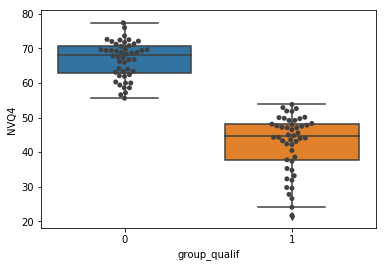

In [182]:
ax = sns.boxplot(x='group_qualif', y='NVQ4', data=box_df)
ax = sns.swarmplot(x="group_qualif", y="NVQ4", data=box_df, color=".25")

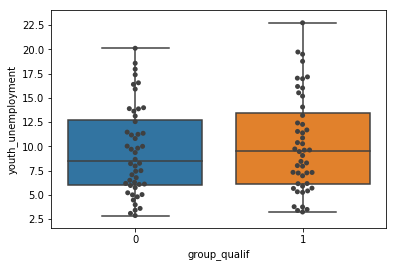

In [196]:
ax = sns.boxplot(y='youth_unemployment', x='group_qualif', data=box_df)
ax = sns.swarmplot(x="group_qualif", y="youth_unemployment", data=box_df, color=".25")

In [203]:
gr1_df.sort_values(['youth_unemployment_rate'], ascending=False).head(n=15)

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3,1,1
29,Waltham Forest,2011,720.0,52.0,71000,0.40,11.5,44.8,19.723419,8.8,10.6,13.5,10.3,1,0
8,Enfield,2011,865.0,56.5,110000,0.54,12.0,44.0,19.496204,5.4,13.0,12.5,12.5,1,1
23,Newham,2011,830.0,52.5,89000,0.41,14.2,48.0,18.763797,9.3,9.8,8.2,7.5,1,0
32,Barking and Dagenham,2012,475.0,56.2,55000,0.46,13.5,29.8,17.159529,8.2,15.2,19.2,12.7,1,1
9,Greenwich,2011,690.0,56.8,81000,0.47,10.8,49.2,17.029480,6.6,14.0,10.7,9.0,1,1
61,Waltham Forest,2012,750.0,54.2,77000,0.43,10.8,47.1,16.970293,7.9,12.1,10.7,8.5,1,0
40,Enfield,2012,955.0,59.1,117000,0.57,11.4,42.4,16.172966,5.0,14.1,13.4,12.0,1,1
6,Croydon,2011,1055.0,60.1,136000,0.56,10.8,43.1,16.016635,6.2,12.0,16.5,12.0,1,1
24,Redbridge,2011,1040.0,58.8,77000,0.42,10.5,43.6,15.520066,8.0,16.5,13.7,6.1,1,1


In [204]:
gr2_df.sort_values(['youth_unemployment_rate'], ascending=False).head(n=15)

,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate,group_qualif,group_econ
12,Haringey,2011,915.0,58.3,74000,0.41,11.5,60.0,20.111833,3.9,9.8,9.6,4.7,0,0
21,Lewisham,2011,765.0,56.7,75000,0.39,10.4,57.2,18.566626,5.5,12.1,8.7,6.8,0,0
26,Southwark,2011,1115.0,55.9,247000,1.16,11.7,64.0,17.959095,4.6,9.5,7.0,5.2,0,0
10,Hackney,2011,1200.0,60.9,113000,0.63,10.7,56.6,17.381317,7.0,7.2,12.5,7.3,0,0
17,Islington,2011,1340.0,61.5,201000,1.29,9.5,69.2,16.550028,4.1,6.1,5.5,7.6,0,0
44,Haringey,2012,850.0,56.7,80000,0.44,10.3,62.4,16.388428,5.4,10.1,7.9,4.8,0,0
53,Lewisham,2012,835.0,59.0,78000,0.40,10.5,63.4,15.902504,5.2,11.7,6.7,5.2,0,0
42,Hackney,2012,1255.0,58.6,112000,0.62,10.8,60.3,13.982233,4.9,8.7,10.9,7.0,0,0
20,Lambeth,2011,1150.0,59.1,150000,0.66,10.4,66.2,13.888113,7.8,7.6,5.2,5.1,0,0
5,Camden,2011,1835.0,57.3,331000,2.06,8.8,69.4,13.865943,4.0,8.2,7.2,5.2,0,0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



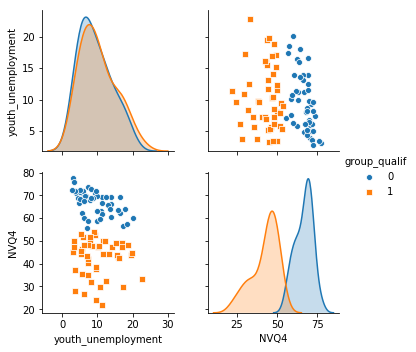

In [193]:
sns.pairplot(box_df, vars=['youth_unemployment', 'NVQ4'],hue='group_qualif', diag_kind='kde', markers=["o","s"])

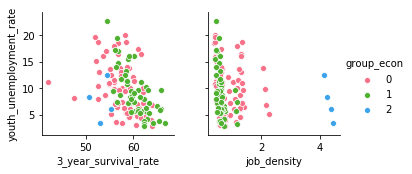

In [230]:
fig = sns.pairplot(df_1, diag_kind='kde', hue='group_econ',
                   palette="husl", diag_kws=dict(shade=True),
                   x_vars=['3_year_survival_rate', 'job_density'],
                   y_vars=['youth_unemployment_rate'])

In [225]:
for group in df_1['group_econ'].unique().tolist():
    print(f"group {group}: ")
    print(df_1[df_1['group_econ'] == group].describe())
    print()
    print()

group 1: 
       3_year_survival_rate  job_density  3_year_survival_number  \
count             52.000000    52.000000               52.000000   
mean              60.578846     0.610192              974.423077   
std                2.937609     0.174125              326.437475   
min               54.500000     0.420000              455.000000   
25%               58.700000     0.515000              712.500000   
50%               60.300000     0.570000              927.500000   
75%               62.700000     0.630000             1193.750000   
max               66.700000     1.150000             1965.000000   

       number_of_jobs  youth_unemployment_rate  group_econ  
count       52.000000                52.000000        52.0  
mean    103519.230769                 9.063236         1.0  
std      39599.708052                 4.516072         0.0  
min      54000.000000                 2.771333         1.0  
25%      79750.000000                 5.728179         1.0  
50%      86

In [243]:
df_1[df_1['group_econ'] == 2]

,3_year_survival_rate,job_density,3_year_survival_number,number_of_jobs,youth_unemployment_rate,group_econ
31,54.5,4.16,3615.0,674000,12.549213,2
63,50.8,4.26,3515.0,698000,8.255762,2
95,55.4,4.39,4280.0,717000,6.074616,2
127,53.1,4.45,4380.0,737000,3.420368,2


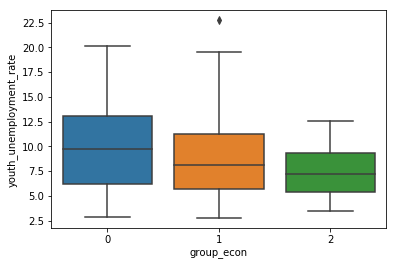

In [227]:
sns.boxplot(y='youth_unemployment_rate', x='group_econ', data=df_1)

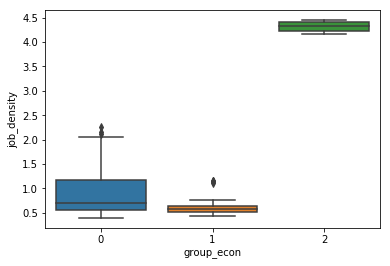

In [229]:
sns.boxplot(y='job_density', x='group_econ', data=df_1)

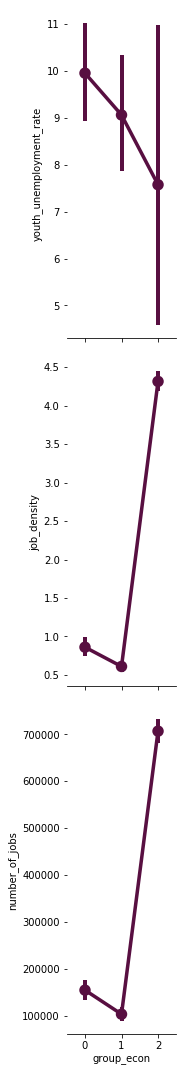

In [242]:
#fig, ax =plt.subplots(1,3)
g = sns.PairGrid(df_1, y_vars=["youth_unemployment_rate",'job_density', 'number_of_jobs'],
                 x_vars=["group_econ"],
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
#g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)